<a href="https://colab.research.google.com/github/Elibaque/SIM_YAC_ELIANA_UPSE2023/blob/main/Ecuacion_de_la_difusividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Datos
P = 4000
tiempo_maximo = 10000
distancia_total = 1000
N = 6
delta_t = 10

In [2]:
# Parámetros de espaciado y tiempo
dx = distancia_total / (N - 1)
dt = delta_t
DistanceT= np.arange(0,distancia_total+1,dx)

In [3]:
# Cálculo del número de iteraciones
num_iteraciones = int(tiempo_maximo / delta_t)

# Crear matrices para almacenar los valores de P
P_a = np.zeros(N)
P_s = np.zeros(N)

In [4]:
P_s

array([0., 0., 0., 0., 0., 0.])

In [5]:
P_a

array([0., 0., 0., 0., 0., 0.])

In [6]:
# Establecer condiciones iniciales
P_a[0] = 0  # Condición de frontera izquierda
P_a[N - 1] = 0  # Condición de frontera derecha
P_a[1:N - 1] = P  # Condición inicial en el interior

In [7]:
# Lista para almacenar los valores de P en cada paso de tiempo
Pr = [np.copy(P_a)]

In [8]:
Pr

[array([   0., 4000., 4000., 4000., 4000.,    0.])]

In [9]:
# Iterar en el tiempo
for _ in range(num_iteraciones):
    for i in range(1, N - 1):
        P_s[i] = ((math.floor(P_a[i - 1]) - 2 * math.floor(P_a[i]) + math.floor(P_a[i + 1])) / (dx ** 2)) * dt + math.floor(P_a[i])

    # Actualizar los valores de P
    P_a = np.copy(P_s)

    # Almacenar los valores de P en cada paso de tiempo
    Pr.append(np.copy(P_a))

presiones = np.array(Pr)

# Crear el array de tiempos
tiempos = np.arange(0, tiempo_maximo + delta_t, delta_t)

# Imprimir los resultados
print("Presiones con respecto al tiempo:")
for tiempo, presion in enumerate(presiones):
    print(f"Tiempo: {tiempo * delta_t}, Presiones: {presion}")

Presiones con respecto al tiempo:
Tiempo: 0, Presiones: [   0. 4000. 4000. 4000. 4000.    0.]
Tiempo: 10, Presiones: [   0. 3999. 4000. 4000. 3999.    0.]
Tiempo: 20, Presiones: [   0.      3998.0005  3999.99975 3999.99975 3998.0005     0.     ]
Tiempo: 30, Presiones: [   0.      3997.00075 3998.99975 3998.99975 3997.00075    0.     ]
Tiempo: 40, Presiones: [   0.      3996.001   3997.99975 3997.99975 3996.001      0.     ]
Tiempo: 50, Presiones: [   0.      3995.00125 3996.99975 3996.99975 3995.00125    0.     ]
Tiempo: 60, Presiones: [   0.      3994.0015  3995.99975 3995.99975 3994.0015     0.     ]
Tiempo: 70, Presiones: [   0.      3993.00175 3994.99975 3994.99975 3993.00175    0.     ]
Tiempo: 80, Presiones: [   0.      3992.002   3993.99975 3993.99975 3992.002      0.     ]
Tiempo: 90, Presiones: [   0.      3991.00225 3992.99975 3992.99975 3991.00225    0.     ]
Tiempo: 100, Presiones: [   0.      3990.0025  3991.99975 3991.99975 3990.0025     0.     ]
Tiempo: 110, Presiones: [

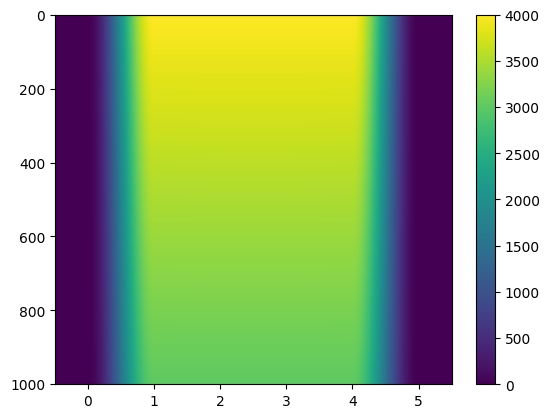

In [10]:
plt.plot(tiempos, presiones)
imgplot = plt.imshow(presiones,aspect='auto')
plt.colorbar()

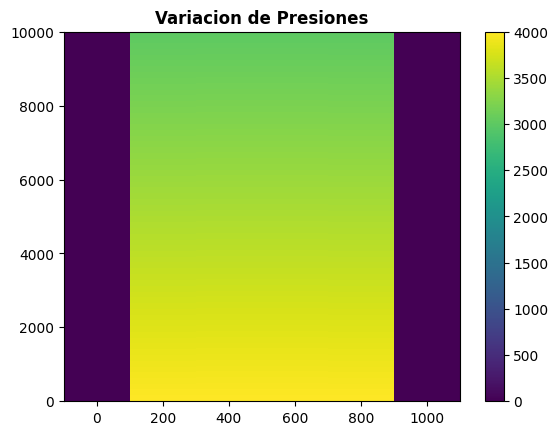

In [11]:
c = plt.pcolormesh(DistanceT,tiempos,presiones)
plt.colorbar(c)
 
plt.title('Variacion de Presiones', fontweight ="bold")
plt.show()

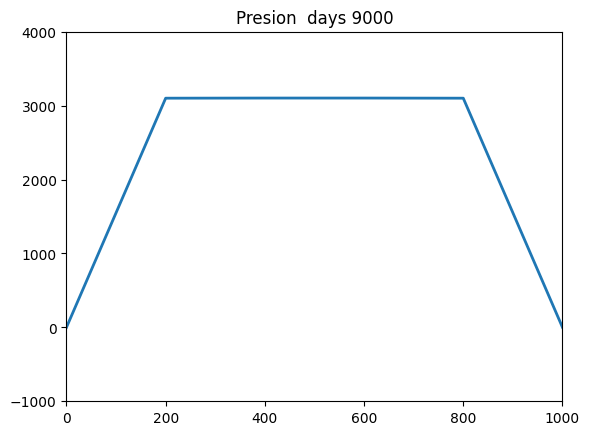

In [12]:
#@title Texto de título predeterminado
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.set_xlim((0, 1000))
ax.set_ylim((-1000, 4000))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def init():
    line.set_data([],[])
    return(line,)

def animate(i):
    x = DistanceT
    y = presiones[i]
    line.set_data(x, y)
    #line2.set_data(y, x)
    ax.set(title='Presion  days ' + str(i*delta_t))
    return (line,)
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=range(0,1000,100), interval=200, blit=True)
HTML(anim.to_html5_video())